In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("../Data.csv",index_col="Date")
df.index=pd.to_datetime(df.index)

In [4]:
df

,Close,High,Low,Open,Volume
Date,,,,,
2020-02-10,78.119225,78.119225,76.248546,76.328715,109348800
2020-02-11,77.647942,78.690182,77.429292,78.617301,94323200
2020-02-12,79.491882,79.496739,78.099800,78.099800,113730400
2020-02-13,78.925804,79.253782,78.556529,78.760603,94747600
2020-02-14,78.945267,79.195501,78.435079,78.894243,80113600
...,...,...,...,...,...
2025-02-03,228.009995,231.830002,225.699997,229.990005,73063300
2025-02-04,232.800003,233.130005,226.649994,227.250000,45067300
2025-02-05,232.470001,232.669998,228.270004,228.529999,39620300


# Introduction au Dataset AAPL

Ce dataset contient les données historiques des prix de l'action Apple (AAPL), téléchargées via `yfinance`. Voici une description des variables incluses :

- **Date** : La date de l'enregistrement des données.
- **Close** : Le prix de clôture de l'action à la fin de la journée de trading.
- **High** : Le prix le plus élevé de l'action pendant la journée de trading.
- **Low** : Le prix le plus bas de l'action pendant la journée de trading.
- **Open** : Le prix d'ouverture de l'action au début de la journée de trading.
- **Volume** : Le nombre d'actions échangées pendant la journée de trading.

Ces données couvrent une période allant de 2020 à 2025 et peuvent être utilisées pour analyser les tendances et les performances de l'action Apple.

In [5]:
# Format x-axis
from matplotlib.dates import DateFormatter


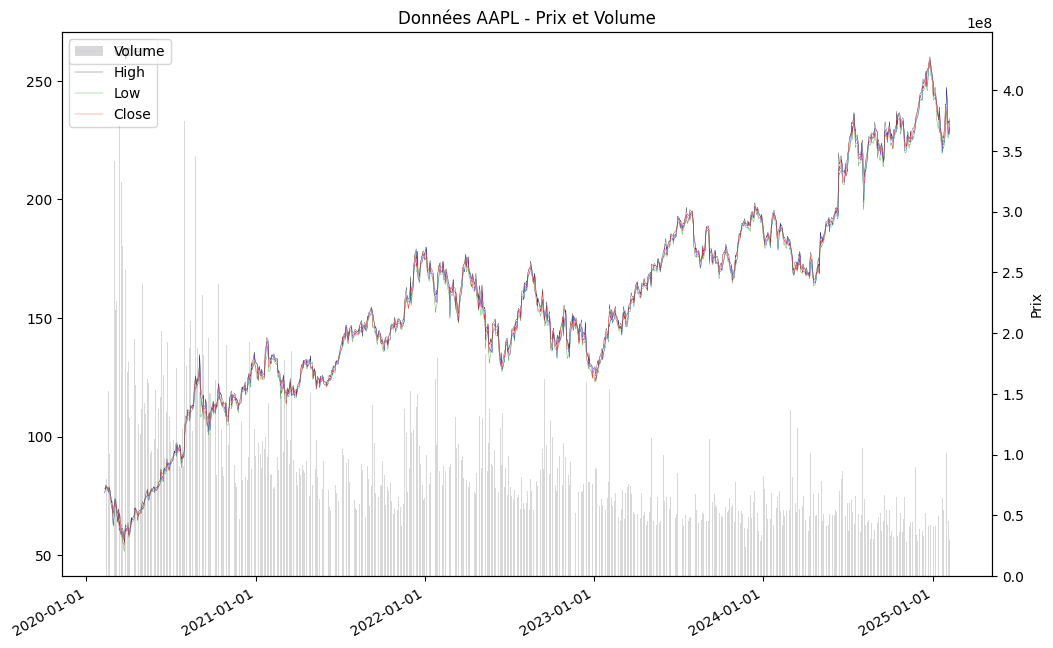

In [6]:
# Créer le graphique
plt.figure(figsize=(12, 8))

# Tracer les prix
plt.plot(df.index, df['Open'], label='Open', color="blue",lw=0.2)
plt.plot(df.index, df['High'], label='High', color="black",lw=0.2)
plt.plot(df.index, df['Low'], label='Low', color="green",lw=0.2)
plt.plot(df.index, df['Close'], label='Close', color="red",lw=0.2)
plt.legend(loc='upper left')
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()
# Ajouter le volume (sur un axe secondaire)
plt.twinx()
plt.bar(df.index, df['Volume'], color='gray', alpha=0.3, label='Volume')

# Ajouter des labels et une légende
plt.title('Données AAPL - Prix et Volume')
plt.xlabel('Date')
plt.xticks(rotation='vertical')
plt.ylabel('Prix')
plt.legend(loc='upper left')

# Afficher le graphique
plt.show()

on s'interse seulement au column "Close"

In [7]:
serie=df['Close']

In [8]:
serie.head()

Date
2020-02-10    78.119225
2020-02-11    77.647942
2020-02-12    79.491882
2020-02-13    78.925804
2020-02-14    78.945267
Name: Close, dtype: float64

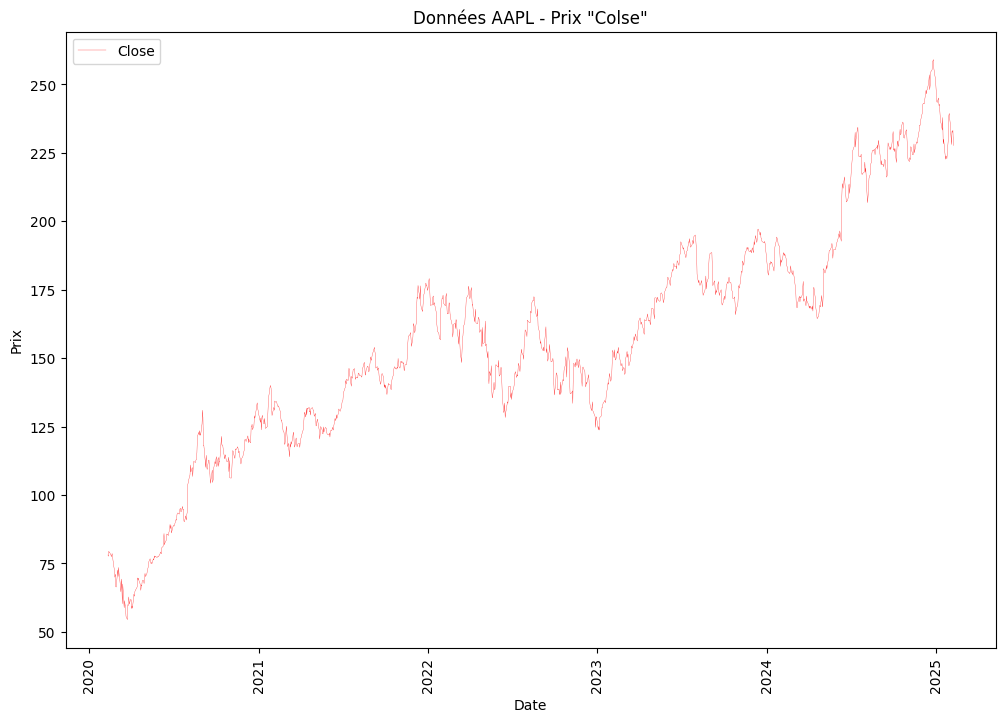

In [9]:
plt.figure(figsize=(12, 8))
plt.plot(df.index, df['Close'], label='Close', color="red",lw=0.2)
plt.title('Données AAPL - Prix "Colse"')
plt.xlabel('Date')
plt.xticks(rotation='vertical')
plt.ylabel('Prix')
plt.legend(loc='upper left')

# Analyse des Composantes de la Série Temporelle

Nous allons analyser si la série contient les trois composantes principales :

## 1. **Tendance (Trend) ✅**  
   - On observe une augmentation générale du prix, indiquant une tendance haussière à long terme.  
   - Cela signifie que le prix de l’action AAPL suit une évolution croissante.

## 2. **Saisonnalité (Seasonality) ❌**  
   - Aucune répétition claire de motifs périodiques n’est visible.  
   - Les variations semblent être plus influencées par la tendance et des fluctuations irrégulières.

## 3. **Bruit (Noise) ✅**  
   - On observe des variations irrégulières autour de la tendance, ce qui correspond à du bruit.  
   - Ces fluctuations sont imprévisibles et ne suivent pas un schéma clair.

### Conclusion  
La série est principalement composée d’une **tendance haussière** et de **bruit**, mais elle ne présente **pas de saisonnalité évidente**.


<h1>Determination de trend</h1>

In [10]:
import numpy as np


df["timestamps"]=df.index.astype(np.int64) // 10**9  # Convertir en secondes depuis l'époque UNIX
X=df["timestamps"].values.reshape(-1, 1)
y=df['Close'].astype(np.float64) 


In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

# Prédictions de la tendance
df['Trend'] = model.predict(X)

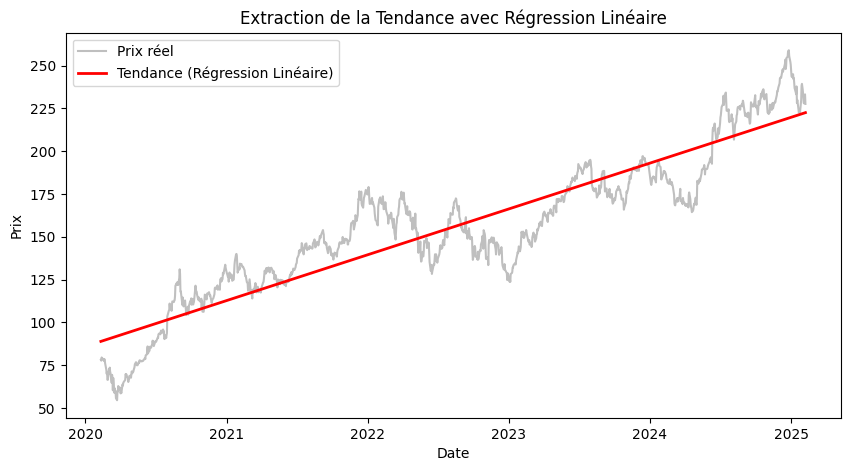

In [12]:
# Affichage des résultats
plt.figure(figsize=(10,5))
plt.plot(df.index, df['Close'], alpha=0.5, label="Prix réel", color='gray')
plt.plot(df.index, df['Trend'], label="Tendance (Régression Linéaire)", color='red', linewidth=2)
plt.legend()
plt.title("Extraction de la Tendance avec Régression Linéaire")
plt.xlabel("Date")
plt.ylabel("Prix")
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Supposons que df est ta DataFrame et que 'Close' est la colonne des prix
result = adfuller(df['Close'])

# Affichage des résultats
print("Statistique de test ADF:", result[0])
print("p-value:", result[1])



Statistique de test ADF: -1.2488412420527693
p-value: 0.6522407546965566


: 

<h1>P-values < 0.05 ==> La serie est Non Stationnaire</h1>